# HMS - Harmful Brain Activity Classification

Jin Jing, Zhen Lin, Chaoqi Yang, Ashley Chow, Sohier Dane, Jimeng Sun, M. Brandon Westover. (2024). HMS - Harmful Brain Activity Classification . Kaggle. https://kaggle.com/competitions/hms-harmful-brain-activity-classification

## Mount Google Drive

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download HMS-Harmful-Brain-Activity-Classification

100% 18.4G/18.4G [03:53<00:00, 90.2MB/s]
100% 18.4G/18.4G [03:53<00:00, 84.7MB/s]


In [ ]:
! unzip HMS-Harmful-Brain-Activity-Classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_spectrograms/208059969.parquet  
  inflating: train_spectrograms/2080686415.parquet  
  inflating: train_spectrograms/2080973847.parquet  
  inflating: train_spectrograms/2081117549.parquet  
  inflating: train_spectrograms/2081307623.parquet  
  inflating: train_spectrograms/2081826095.parquet  
  inflating: train_spectrograms/2081944512.parquet  
  inflating: train_spectrograms/2082016410.parquet  
  inflating: train_spectrograms/2082370788.parquet  
  inflating: train_spectrograms/2082376822.parquet  
  inflating: train_spectrograms/2082907673.parquet  
  inflating: train_spectrograms/2083007837.parquet  
  inflating: train_spectrograms/2083142969.parquet  
  inflating: train_spectrograms/2083155730.parquet  
  inflating: train_spectrograms/208321640.parquet  
  inflating: train_spectrograms/2083642063.parquet  
  inflating: train_spectrograms/2084695153.parquet  
  inflating: train_spectrograms/2084838638.parquet

## Imports

In [ ]:
! pip install pyarrow
! pip install --upgrade numpy
! pip install h5py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 44.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2


In [ ]:
! pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 30.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
pip install --upgrade --force-reinstall scikit-learn

  Using cached scikit_learn-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.2/301.2 kB 27.0 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.4.0
    Uninstalling threadpoolctl-3.4.0:
      Successfully uninstalled threadpoolctl-3.4.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.0
    Uninstalling joblib-1.4.0:
      Successfully uninstalled joblib-1.4.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  A

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import os
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
tqdm.pandas()
pd.options.display.max_colwidth = 10000

In [ ]:
import torch
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import networkx as nx

## Pre-Prcoessing

In [ ]:
#Train data
train_df = pd.read_csv(r'train.csv')

In [ ]:
#Mapping train_eegs and train_spectogram full path
def create_id_mapping(paths_list):
    id_map = {}
    for path in paths_list:
        file_id = os.path.basename(path).split('.')[0]  # Corrected to extract the file ID correctly
        id_map[file_id] = path
    return id_map

def mapping_id(ids, id_map):
    return id_map.get(ids)

In [ ]:
#Create ID mappings for train_eeg_path_list and train_spectrograms_path_list
train_eeg_path_list = glob.glob("train_eegs/*")
train_spectrograms_path_list = glob.glob("train_spectrograms/*")
eeg_id_map = create_id_mapping(train_eeg_path_list)
spectrograms_id_map = create_id_mapping(train_spectrograms_path_list)

print("Mapping train_eeg_path_list","-"*60)
train_df['eeg_path'] = train_df['eeg_id'].astype(str).progress_apply(lambda x: mapping_id(x, eeg_id_map))

print("Mapping train_spectrograms_path_list","-"*60)
train_df['spectrograms_path'] = train_df['spectrogram_id'].astype(str).progress_apply(lambda x: mapping_id(x, spectrograms_id_map))

Mapping train_eeg_path_list ------------------------------------------------------------


100%|██████████| 106800/106800 [00:00<00:00, 366283.61it/s]


Mapping train_spectrograms_path_list ------------------------------------------------------------


100%|██████████| 106800/106800 [00:00<00:00, 363451.10it/s]


In [ ]:
train_df.head(1)

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,eeg_path,spectrograms_path
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0,train_eegs/1628180742.parquet,train_spectrograms/353733.parquet


In [ ]:
test_df = pd.read_csv(r'test.csv')

In [ ]:
#Create ID mappings for train_eeg_path_list and train_spectrograms_path_list
test_eeg_path_list = glob.glob("test_eegs/*")
test_spectrograms_path_list = glob.glob("test_spectrograms/*")
eeg_id_map = create_id_mapping(test_eeg_path_list)
spectrograms_id_map = create_id_mapping(test_spectrograms_path_list)

print("Mapping train_eeg_path_list","-"*60)
test_df['eeg_path'] = test_df['eeg_id'].astype(str).progress_apply(lambda x: mapping_id(x, eeg_id_map))

print("Mapping train_spectrograms_path_list","-"*60)
test_df['spectrograms_path'] = test_df['spectrogram_id'].astype(str).progress_apply(lambda x: mapping_id(x, spectrograms_id_map))

Mapping train_eeg_path_list ------------------------------------------------------------


100%|██████████| 1/1 [00:00<00:00, 368.86it/s]


Mapping train_spectrograms_path_list ------------------------------------------------------------


100%|██████████| 1/1 [00:00<00:00, 1091.98it/s]


In [ ]:
test_df.head(1)

,spectrogram_id,eeg_id,patient_id,eeg_path,spectrograms_path
0,853520,3911565283,6885,test_eegs/3911565283.parquet,test_spectrograms/853520.parquet


In [ ]:
#Convert The parquet file to .npy format
def parquet_to_numpy(parquet_path):
    #Read the Parquet file into a DataFrame
    spec_df = pd.read_parquet(parquet_path)

    #Process the DataFrame to convert it into a numpy array
    spec_array = spec_df.fillna(0).values[:, 1:].T  # fill NaN values with 0, transpose for (Time, Freq) -> (Freq, Time)
    spec_array = spec_array.astype("float32")

    return spec_array

In [ ]:
#Preprocesing The Image
def preprocess_spectrogram(image_array):

    #Normalization:
    image_array = image_array.astype('float32')
    image_array -= np.min(image_array)
    image_array /= np.max(image_array) + 1e-4

    #Log Transformation:
    image_array = np.log(image_array + 1e-4)

    #Mean Subtraction:
    mean = np.mean(image_array)
    image_array -= mean

    #Standardization:
    std = np.std(image_array)
    image_array /= std + 1e-6

    return image_array

In [ ]:
#Create Train And Test Data Directory
current_dir = os.getcwd()
train_dir = os.path.join(current_dir, "train")
test_dir  = os.path.join(current_dir, "test")
print("train_dir--->", train_dir)
print("test_dir---->", test_dir)
os.makedirs(train_dir, exist_ok = True)
os.makedirs(test_dir, exist_ok = True)

train_dir---> /content/train
test_dir----> /content/test


In [ ]:
 #Dumping Train Spectograms Data To Train Dir
 from PIL import Image

 for i in tqdm(train_df['spectrograms_path'].unique()):
     img_array = preprocess_spectrogram(parquet_to_numpy(i))

     img_name = os.path.basename(i).split('.')[0] + ".jpeg"
     spectrograms_path = os.path.join(train_dir, "spectrograms")
     os.makedirs(spectrograms_path, exist_ok=True)

     plt.imsave(os.path.join(spectrograms_path, img_name), img_array)

100%|██████████| 11138/11138 [13:26<00:00, 13.81it/s]


In [ ]:
 #Dumping Test Spectograms to the Test Dir
 from PIL import Image

 for i in tqdm(test_df['spectrograms_path'].unique()):
     img_array = preprocess_spectrogram(parquet_to_numpy(i))

     img_name = os.path.basename(i).split('.')[0] + ".jpeg"
     spectrograms_path = os.path.join(test_dir, "spectrograms")
     os.makedirs(spectrograms_path, exist_ok=True)

     plt.imsave(os.path.join(spectrograms_path, img_name), img_array)

100%|██████████| 1/1 [00:00<00:00,  4.61it/s]


In [ ]:
#Renaming Train Image In Train Directory Adding Class To The Train Image
xx = train_df['spectrograms_path expert_consensus'.split()].drop_duplicates().reset_index(drop = True)
dict_xx = dict(zip(xx['spectrograms_path'], xx['expert_consensus']))

In [ ]:
for original_path in tqdm(glob.glob("train/spectrograms/*")):
    #Extract the image ID from the file name
    img_id = os.path.basename(original_path).split('.')[-2]
    #Find the corresponding value in dict_xx based on the image ID
    xx = [v for k, v in dict_xx.items() if img_id in k][0]

    #Construct the new file name with the same directory path
    directory_path = os.path.dirname(original_path)
    new_filename = f"{xx}.{img_id}.jpeg"

    #Construct the new file path
    new_path = os.path.join(directory_path, new_filename)

    #Rename the file
    os.rename(original_path, new_path)

100%|██████████| 11138/11138 [00:20<00:00, 554.09it/s]


In [ ]:
del xx, dict_xx

In [ ]:
#Creat Function Which Will Plot The Random Image From The Directory
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def plot_random_images(dir_path, num_images, folder_name):
    if not os.path.exists(dir_path):
        print("Directory does not exist.")
        return

    image_files = [f for f in os.listdir(dir_path) if f.endswith('.jpeg') or f.endswith('.png') or f.endswith('.jpg')]
    if len(image_files) == 0:
        print("No image files found in the directory.")
        return

    #Shuffle the list of image files
    random.shuffle(image_files)

    #Limit the number of images to plot
    num_images = min(num_images, len(image_files))

    #Calculate the number of rows and columns based on the aspect ratio of the images
    num_rows = int(num_images ** 0.5)
    num_cols = (num_images + num_rows - 1) // num_rows

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

    for i in range(num_images):
        img_path = os.path.join(dir_path, image_files[i])
        img = Image.open(img_path)

        row = i // num_cols
        col = i % num_cols

        ax = axes[row, col]
        ax.imshow(img, cmap="gray")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel(image_files[i], fontsize=8, wrap=True)

    #Hide any remaining empty subplots
    for i in range(num_images, num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        axes[row, col].axis('off')

    plt.suptitle(folder_name, fontsize=16)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.show()

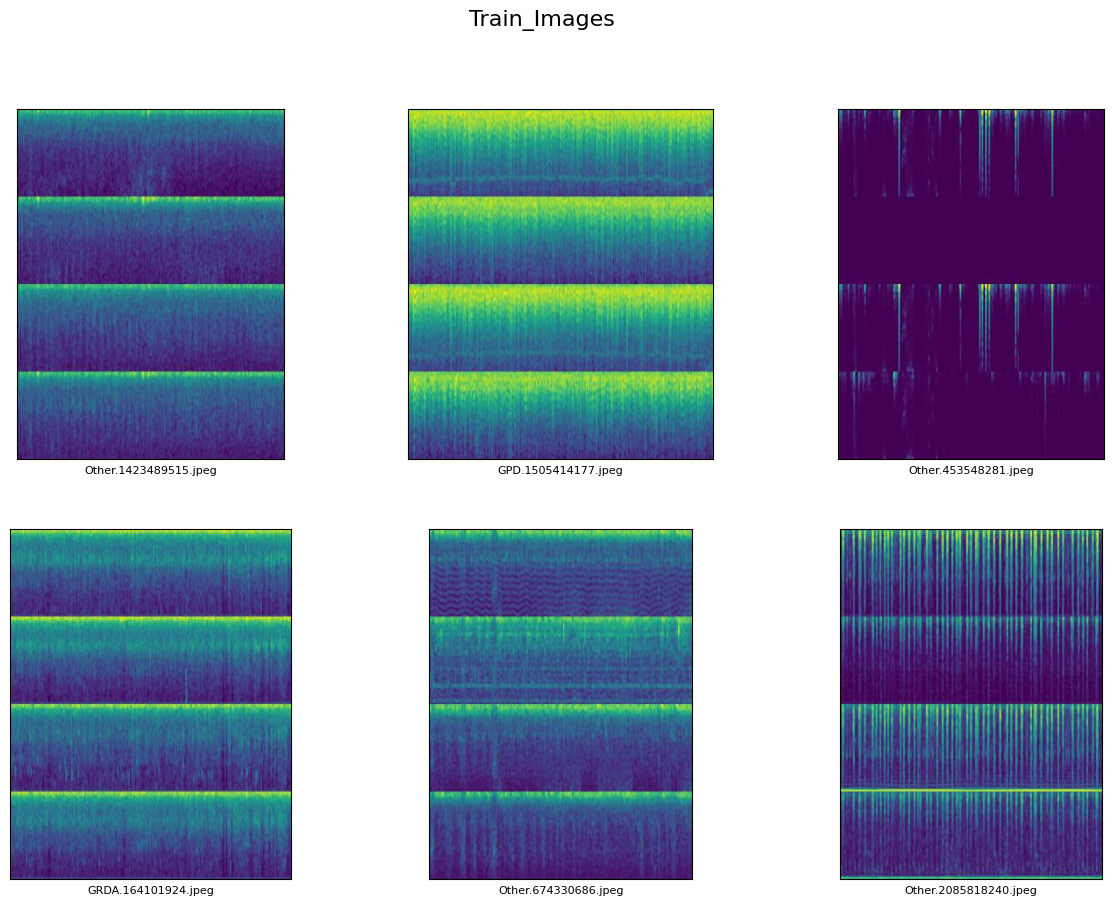

In [ ]:
training_dir_spectrograms = 'train/spectrograms'
plot_random_images(training_dir_spectrograms, 6, "Train_Images")

In [ ]:
#Create A Train Data Frame Which Will Contain Training Image Path And Their Class Along With Their EEG_ID
def create_id_mapping(paths_list):
    id_map = {}
    for path in paths_list:
        file_id = os.path.basename(path).split('.')[1]
        id_map[file_id] = path
    return id_map

def mapping_id(ids, id_map):
    return id_map.get(ids)

In [ ]:
#Create ID mappings for train_eeg_path_list and train_spectrograms_path_list
train_spectrograms_path_list = glob.glob("train/spectrograms/*")
spectrograms_id_map = create_id_mapping(train_spectrograms_path_list)

train_df = train_df['eeg_id spectrogram_id expert_consensus'.split()].drop_duplicates().reset_index(drop = True)

train_df['spectrograms_path'] = train_df['spectrogram_id'].astype(str).progress_apply(lambda x: mapping_id(x, spectrograms_id_map))

100%|██████████| 18013/18013 [00:00<00:00, 204175.28it/s]


In [ ]:
train_df['spectrograms_path']

0         train/spectrograms/Seizure.353733.jpeg
1             train/spectrograms/GPD.924234.jpeg
2            train/spectrograms/LRDA.999431.jpeg
3           train/spectrograms/LRDA.1084844.jpeg
4        train/spectrograms/Seizure.1219001.jpeg
                          ...                   
18008     train/spectrograms/LPD.2146798838.jpeg
18009     train/spectrograms/LPD.2146798838.jpeg
18010     train/spectrograms/LPD.2146798838.jpeg
18011     train/spectrograms/LPD.2147312808.jpeg
18012    train/spectrograms/LRDA.2147388374.jpeg
Name: spectrograms_path, Length: 18013, dtype: object

In [ ]:
#Creating Train And Validation Split
train_df.head(2)

,eeg_id,spectrogram_id,expert_consensus,spectrograms_path
0,1628180742,353733,Seizure,train/spectrograms/Seizure.353733.jpeg
1,2277392603,924234,GPD,train/spectrograms/GPD.924234.jpeg


In [ ]:
import numpy
import sklearn
print(numpy.__version__)
print(sklearn.__version__)

1.26.4
1.4.2


In [ ]:
from sklearn.model_selection import train_test_split
train_dataset, valid_dataset = train_test_split(train_df ,test_size = 0.3 , random_state = 42, shuffle = True,
                                               stratify = train_df['expert_consensus'])

In [ ]:
train_dataset.head(1)

,eeg_id,spectrogram_id,expert_consensus,spectrograms_path
1859,2316276690,226714583,Other,train/spectrograms/Seizure.226714583.jpeg


### Image Data Generator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generators
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

### Training Set and Validation Set

In [ ]:
training_set = train_datagen.flow_from_dataframe(
                        dataframe = train_dataset,
                        x_col = 'spectrograms_path',
                        y_col = 'expert_consensus',
                        target_size=(299,299),
                        color_mode='rgb',
                        class_mode = 'categorical',
                        batch_size= 64)

validation_set = test_datagen.flow_from_dataframe(
                dataframe = valid_dataset,
                x_col = 'spectrograms_path',
                y_col = 'expert_consensus',
                color_mode='rgb',
                target_size = (299, 299),
                class_mode = 'categorical',
                batch_size = 64)

Found 12609 validated image filenames belonging to 6 classes.
Found 5404 validated image filenames belonging to 6 classes.


In [ ]:
!pip install torch_geometric
!pip install torcheeg

!pip install eeg_positions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.8/230.8 kB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.9/801.9 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
EEG_PATH_TRAIN = '/content/train_eegs'
EEG_PATH_TEST = '/content/test_eegs'

df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
df_train.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


In [ ]:
print("Train dataset statistics:")
print(df_train.info())
print(df_train.describe())

print("\nTest dataset statistics:")
print(df_test.info())
print(df_test.describe())

Train dataset statistics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106800 entries, 0 to 106799
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   eeg_id                            106800 non-null  int64  
 1   eeg_sub_id                        106800 non-null  int64  
 2   eeg_label_offset_seconds          106800 non-null  float64
 3   spectrogram_id                    106800 non-null  int64  
 4   spectrogram_sub_id                106800 non-null  int64  
 5   spectrogram_label_offset_seconds  106800 non-null  float64
 6   label_id                          106800 non-null  int64  
 7   patient_id                        106800 non-null  int64  
 8   expert_consensus                  106800 non-null  object 
 9   seizure_vote                      106800 non-null  int64  
 10  lpd_vote                          106800 non-null  int64  
 11  gpd_vote                  

## Visualizations

### Offset Seconds

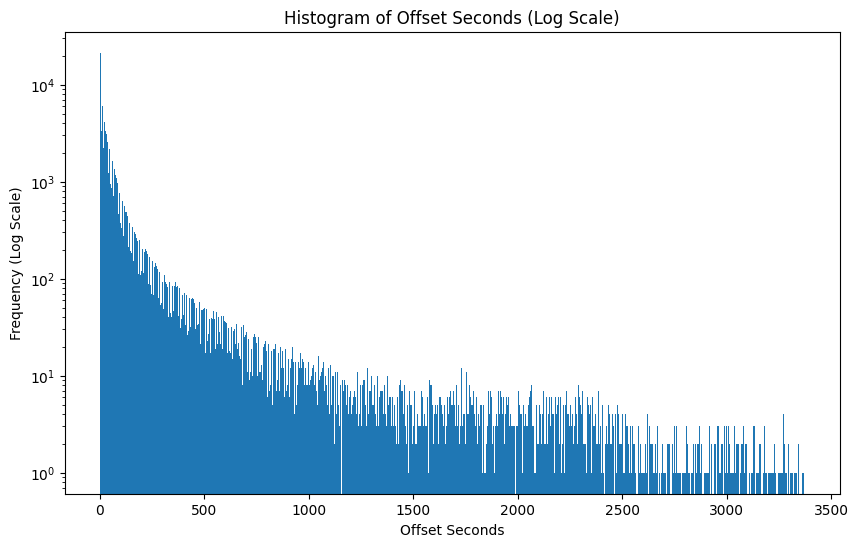

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df_train['eeg_label_offset_seconds'], bins='auto', log=True)
plt.xlabel('Offset Seconds')
plt.ylabel('Frequency (Log Scale)')
plt.title('Histogram of Offset Seconds (Log Scale)')
plt.show()

### Distribution of Brain Activity - Training

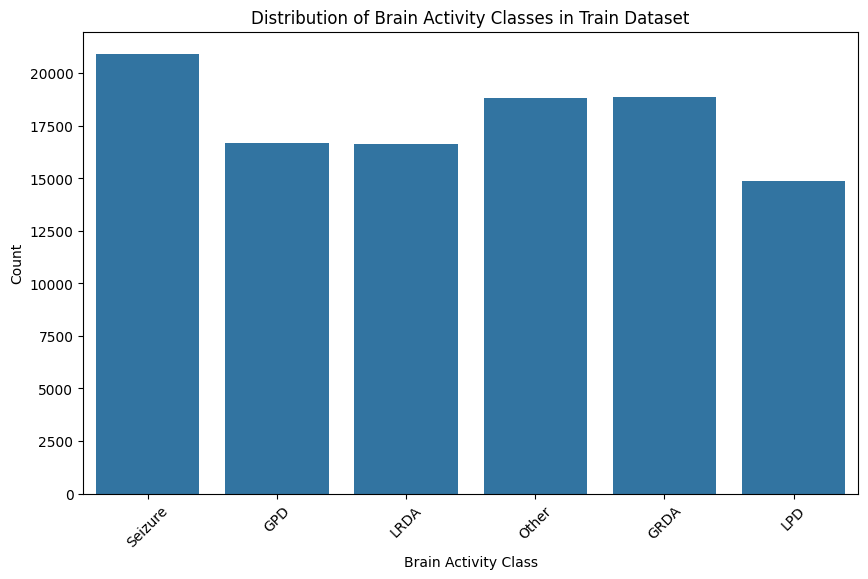

In [ ]:
#Label distribution in training dataset
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='expert_consensus')
plt.title('Distribution of Brain Activity Classes in Train Dataset')
plt.xlabel('Brain Activity Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Analyze Sample EGG

In [ ]:
sample_train_eeg = pd.read_parquet("/content/train_eegs/1000913311.parquet")
sample_train_eeg

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
0,-105.849998,-89.230003,-79.459999,-49.230000,-99.730003,-87.769997,-53.330002,-50.740002,-32.250000,-42.099998,-43.270000,-88.730003,-74.410004,-92.459999,-58.930000,-75.739998,-59.470001,8.210000,66.489998,1404.930054
1,-85.470001,-75.070000,-60.259998,-38.919998,-73.080002,-87.510002,-39.680000,-35.630001,-76.839996,-62.740002,-43.040001,-68.629997,-61.689999,-69.320000,-35.790001,-58.900002,-41.660000,196.190002,230.669998,3402.669922
2,8.840000,34.849998,56.430000,67.970001,48.099998,25.350000,80.250000,48.060001,6.720000,37.880001,61.000000,16.580000,55.060001,45.020000,70.529999,47.820000,72.029999,-67.180000,-171.309998,-3565.800049
3,-56.320000,-37.279999,-28.100000,-2.820000,-43.430000,-35.049999,3.910000,-12.660000,8.650000,3.830000,4.180000,-51.900002,-21.889999,-41.330002,-11.580000,-27.040001,-11.730000,-91.000000,-81.190002,-1280.930054
4,-110.139999,-104.519997,-96.879997,-70.250000,-111.660004,-114.430000,-71.830002,-61.919998,-76.150002,-79.779999,-67.480003,-99.029999,-93.610001,-104.410004,-70.070000,-89.250000,-77.260002,155.729996,264.850006,4325.370117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-45.540001,-26.459999,-23.209999,-25.250000,-21.559999,-36.549999,10.730000,-16.290001,-55.919998,-28.670000,-29.770000,-22.000000,3.710000,8.470000,0.480000,9.950000,33.959999,110.510002,58.599998,301.239990
9996,-26.860001,4.350000,7.410000,7.830000,5.260000,7.750000,50.130001,4.150000,1.720000,22.100000,7.150000,-6.820000,38.070000,32.880001,21.990000,32.990002,60.209999,-156.949997,-275.929993,-4634.799805
9997,-133.759995,-111.190002,-119.180000,-105.760002,-130.039993,-104.059998,-68.290001,-86.480003,-57.130001,-68.830002,-95.839996,-107.540001,-86.449997,-94.099998,-97.050003,-86.339996,-68.040001,-14.880000,66.440002,1667.800049
9998,-78.889999,-59.660000,-60.770000,-59.810001,-63.020000,-60.020000,-20.690001,-42.820000,-68.669998,-54.740002,-62.810001,-52.869999,-34.099998,-31.500000,-37.810001,-32.259998,-10.870000,137.559998,193.839996,2743.379883


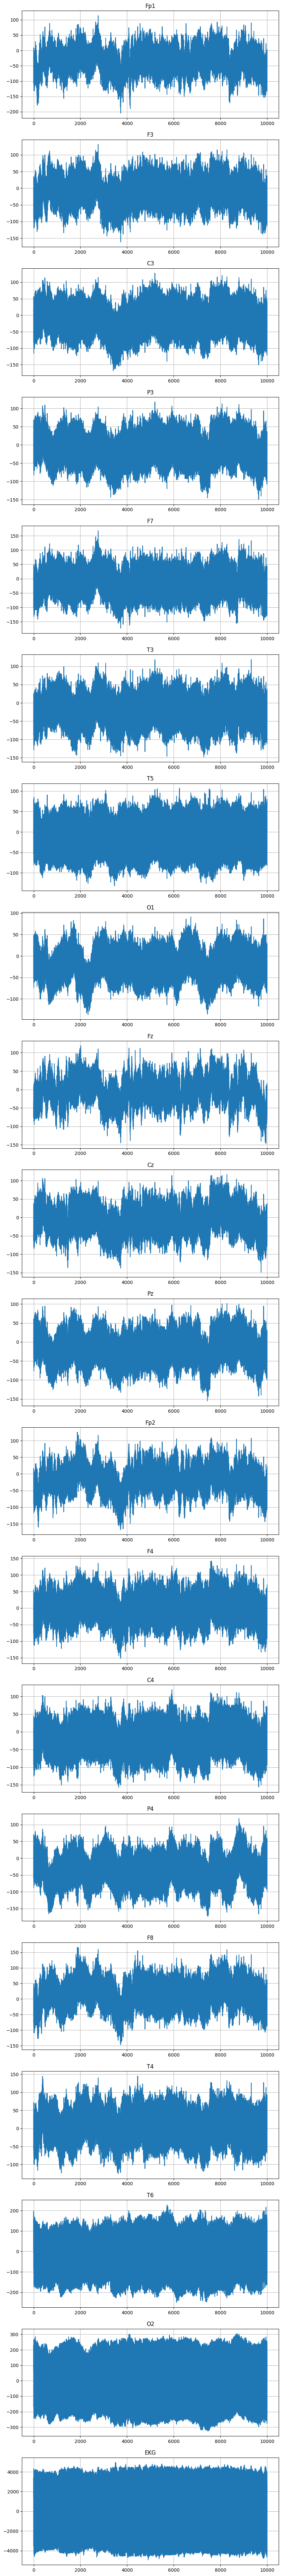

In [ ]:
#Analyze Sample EEG Structure

fig, ax = plt.subplots(20, figsize=(10, 100))

#Line plot
for i, column in enumerate(sample_train_eeg.columns):
    ax[i].plot(sample_train_eeg.index, sample_train_eeg[column], label=column)
    ax[i].grid(True)
    ax[i].set_title(str(column))
plt.show()

### Distribution of EEG Agreement as Consensus

In [ ]:
#Adding a new column 'total_evaluators' that sums up the six specified columns
df_train['total_evaluators'] = df_train[['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']].sum(axis=1)

df_train.sample(25)  #DataFrame with the new column

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,total_evaluators
52568,304123929,8,18.0,1038491962,8,18.0,3313101283,29007,LRDA,0,1,0,2,0,0,3
89833,2864918309,18,84.0,1836830050,19,654.0,2661883021,65378,GRDA,0,0,1,0,6,5,12
10359,1071881837,0,0.0,192670572,0,0.0,612876598,31321,GRDA,0,0,0,1,9,5,15
52637,2084690855,6,16.0,1040192160,6,16.0,2186516278,43649,GPD,0,3,7,0,0,5,15
12300,3149460973,1,6.0,236332660,1,6.0,897398059,2384,LPD,0,2,0,0,0,1,3
51172,2802810949,2,28.0,1002921461,2,28.0,1238111139,60066,Other,0,0,0,0,2,11,13
83838,2789061822,5,38.0,1713404551,10,244.0,1262233161,38549,Other,0,3,1,1,3,5,13
61040,3254788192,6,46.0,1235783608,6,46.0,995594109,19314,Other,1,0,0,0,4,11,16
60597,2902891107,7,32.0,1220428602,7,32.0,3265635476,25865,GRDA,0,0,0,0,3,0,3
34381,2055552797,73,324.0,679452008,73,324.0,1203411388,43888,GRDA,0,0,0,0,9,7,16


In [ ]:
#Add an additional column 'consensus_column' to 'df'

#Finding the column with the largest number for each row and storing the value in 'consensus'
df_train['consensus'] = df_train[['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']].max(axis=1)

#Identifying the column name that corresponds to the max value for each row
df_train['consensus_column'] = df_train[['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']].idxmax(axis=1)

df_train.head()  #DataFrame with the new columns

df_train.sample(25)

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,total_evaluators,consensus,consensus_column
23202,3690440373,72,320.0,449236585,72,320.0,3325454881,37409,GPD,0,1,2,0,0,0,3,2,gpd_vote
27496,3241205521,3,6.0,533635444,3,6.0,3891934862,53628,Other,0,0,0,0,0,3,3,3,other_vote
8212,4203450228,163,744.0,152656867,163,744.0,99990787,9969,GRDA,0,0,0,0,3,0,3,3,grda_vote
49222,1187918693,11,36.0,961479411,11,36.0,354222690,50102,GPD,0,0,9,0,0,2,11,9,gpd_vote
10124,3497394677,0,0.0,186742874,0,0.0,3436926522,65378,Other,0,0,0,0,0,1,1,1,other_vote
10863,3128592129,6,38.0,205262288,6,38.0,2841258593,47746,Seizure,3,0,0,0,0,0,3,3,seizure_vote
71269,1961421978,6,40.0,1428779217,6,40.0,1967288349,62374,GRDA,0,0,0,0,3,0,3,3,grda_vote
79805,2506892020,6,52.0,1616517939,6,52.0,1318225040,64101,Seizure,3,0,0,0,0,0,3,3,seizure_vote
102218,1556053419,5,18.0,2044799942,5,18.0,3887683704,18689,GRDA,0,0,0,0,3,0,3,3,grda_vote
25865,3010079571,11,26.0,512942690,11,26.0,757132572,19638,LRDA,0,0,0,3,0,0,3,3,lrda_vote


In [ ]:
#Create new column that shows the percentage agreement
df_train['row_agreement'] = df_train['consensus']/df_train['total_evaluators']
df_train.sample(25)

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,total_evaluators,consensus,consensus_column,row_agreement
79274,1017659750,4,16.0,1600829772,4,16.0,4006418792,11343,GRDA,0,0,0,0,3,0,3,3,grda_vote,1.000000
59638,2762699655,1,2.0,1196509671,1,2.0,767911582,35861,Other,1,0,0,0,0,2,3,2,other_vote,0.666667
27108,2989566754,10,62.0,525426737,358,5238.0,3498328309,23337,LRDA,0,0,0,2,1,2,5,2,lrda_vote,0.400000
63850,2480577490,4,14.0,1281315783,4,14.0,4257105559,18186,LPD,1,11,0,1,0,2,15,11,lpd_vote,0.733333
47446,1045429553,5,30.0,925662785,5,30.0,4005774435,23738,Seizure,3,0,0,0,0,2,5,3,seizure_vote,0.600000
82820,3920843178,11,46.0,1688055739,29,448.0,551586134,1218,LPD,0,6,0,0,0,6,12,6,lpd_vote,0.500000
70884,1441571063,0,0.0,1419130134,0,0.0,1094944644,42394,Seizure,3,0,0,0,0,0,3,3,seizure_vote,1.000000
10626,3794732127,22,72.0,200303629,22,72.0,1123237532,57480,LRDA,0,0,0,10,0,1,11,10,lrda_vote,0.909091
25400,1706482523,7,26.0,500812223,7,26.0,2881544284,282,Seizure,3,0,0,0,0,0,3,3,seizure_vote,1.000000
48605,1850393860,0,0.0,945005679,10,998.0,3194168861,38549,GPD,0,1,3,0,0,0,4,3,gpd_vote,0.750000


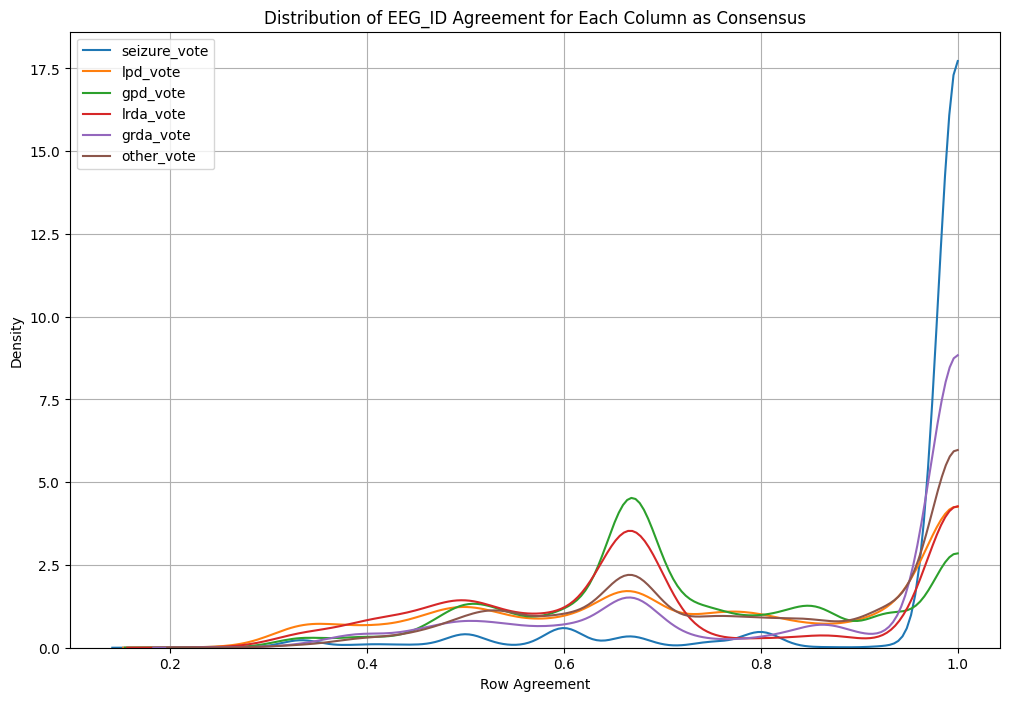

In [ ]:
plt.figure(figsize=(12, 8))

#Plotting distribution curves for each column
for column in ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']:
    #Filter the DataFrame for rows where this column is the consensus
    filtered_df = df_train[df_train['consensus_column'] == column]

    #Plotting the distribution curve with clipping the x-axis range
    sns.kdeplot(filtered_df['row_agreement'], label=column, clip=(0, 1.0))

plt.title('Distribution of EEG_ID Agreement for Each Column as Consensus')
plt.xlabel('Row Agreement')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

## SC Graph

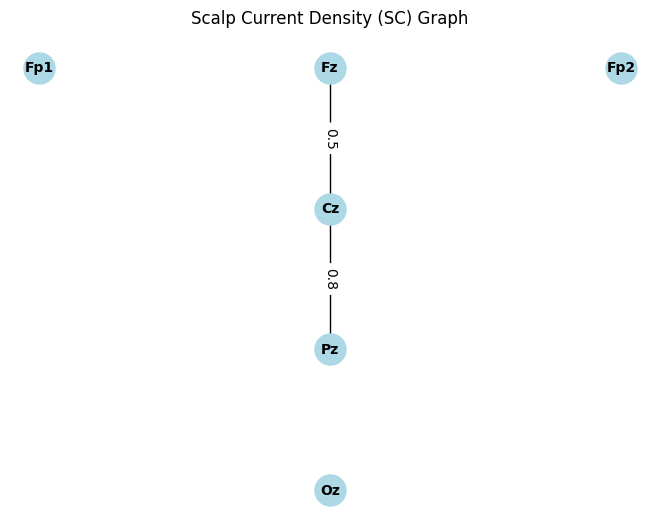

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

#Sample EEG electrode positions
electrode_positions = {
    'Fz': (0, 1),
    'Cz': (0, 0),
    'Pz': (0, -1),
    'Fp1': (-1, 1),
    'Fp2': (1, 1),
    'Oz': (0, -2),
    #Add more electrode positions as needed
}

#Sample connectivity matrix (SC matrix)
connectivity_matrix = {
    ('Fz', 'Cz'): 0.5,
    ('Cz', 'Pz'): 0.8,
    #Add more connections with corresponding weights as needed
}

#Create a graph
G = nx.Graph()

#Add nodes (electrode positions)
G.add_nodes_from(electrode_positions.keys())

#Add edges (connections) with weights
for (node1, node2), weight in connectivity_matrix.items():
    G.add_edge(node1, node2, weight=weight)

#Draw the graph
pos = electrode_positions
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold')

#Draw edge labels
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title('Scalp Current Density (SC) Graph')
plt.show()
